<h1> APS2 </h1>

- Análise bivariada, como dois indicadores se relacionam.



Na parte 1 da APS, utilizamos o indicador "Government expenditure on education, total (% of GDP)" na análise. Já na parte 2, levamos em consideração também o indicador "Unemployment, total (% of total labor force) (modeled ILO estimate)" para assim, poder análisar o grau de relação entre esses dois indicadores. Antes da análise, pressupomos que esses indicadores teriam uma forte correlação já que, como a educação é uma das principais bases da sociedade, se não a principal, consequentemente um país que realiza um investimento maior neste setor teria uma taxa de desemprego menor, já que existiriam mais pessoas capacitadas para fazer parte do mercado de trabalho. Contrariamente, um país que não possui um investimento tão grande no setor da educação teria uma taxa de desemprego maior.
Após a análise, foi possível concluir que as nossa hipótese não estava tão correta como imaginávamos. Dentre os três Países analisados, a Noruega monstrou uma correlação 0.65 entre os indicadores, sendo assim é possível observar que esses indicadores de fato possuem um boa medida de relação nesse País, porém a medida que um indicador cresce ou decresce o outro tende a se comportar de forma semelhante de acordo com a correlação de 0.65. Nos casos do Brasil e do Afeganistão a correlação foi baixa, 0.20 e - 0.02 respectivamente, ilustrando que nesses Países o grau de relação dos dois indicadores é baixo. Após essas observações, fica evidente a importância de uma análise fundamentada em dados, ao passo que apenas pela análise superficial estávamos tendendo a acreditar em uma forte relação dos indicadores em todos os três Países e no casos do Brasil e Afeganistão as correlações foram próximas a zero, e na Noruega onde a correlação se apresentou mais elevada, esperávamos que a correlação fosse negativa, para que um indicador apresentasse movimento oposto ao outro.

Dados:     

Noruega  Correlação: 0.654306, Covariância: 0.242443

Brasil Correlação: 0.204663, Covariância: 0.286128

Afeganistão Correlação: -0.027527, Covariância: 0.010846

In [208]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# lista dos anos que iremos analisar
anos = [str(i) for i in range(2003,2019)]

# lendo dados edu
df_edu = pd.read_csv('dados/government_expenditure/API_SE.XPD.TOTL.GD.ZS_DS2_en_csv_v2_4411877.csv', skiprows=4, decimal='.')

# data frames de educação 3 Países
df_edu_br = df_edu[df_edu['Country Name'] == 'Brazil']
df_edu_nor = df_edu[df_edu['Country Name'] == 'Norway']
df_edu_afg = df_edu[df_edu['Country Name'] == 'Afghanistan']
    
        




In [209]:
# lendo dados desem
df_desem = pd.read_csv('dados/desemprego/API_SL.UEM.TOTL.ZS_DS2_en_csv_v2_4488595.csv', skiprows=4, decimal='.')

# data frames de desemprego 3 Países
df_desem_br = df_desem[df_desem['Country Name'] == 'Brazil']
df_desem_nor = df_desem[df_desem['Country Name'] == 'Norway']
df_desem_afg = df_desem[df_desem['Country Name'] == 'Afghanistan']


/var/folders/8n/d_gn0k3x4k98s_41gm5jms180000gn/T/ipykernel_96342/3866413232.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(anos,df_desem_nor[anos].iloc[0] , "r--", color= 'red', label= 'Desemprego - Noruega')
/var/folders/8n/d_gn0k3x4k98s_41gm5jms180000gn/T/ipykernel_96342/3866413232.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(anos,df_desem_br[anos].iloc[0]  , "r--", color= 'blue', label= 'Desemprego - Brasil')
/var/folders/8n/d_gn0k3x4k98s_41gm5jms180000gn/T/ipykernel_96342/3866413232.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(anos,df_desem_afg[anos].iloc[0] ,"r--", color= 'orange', label= 'Desemprego

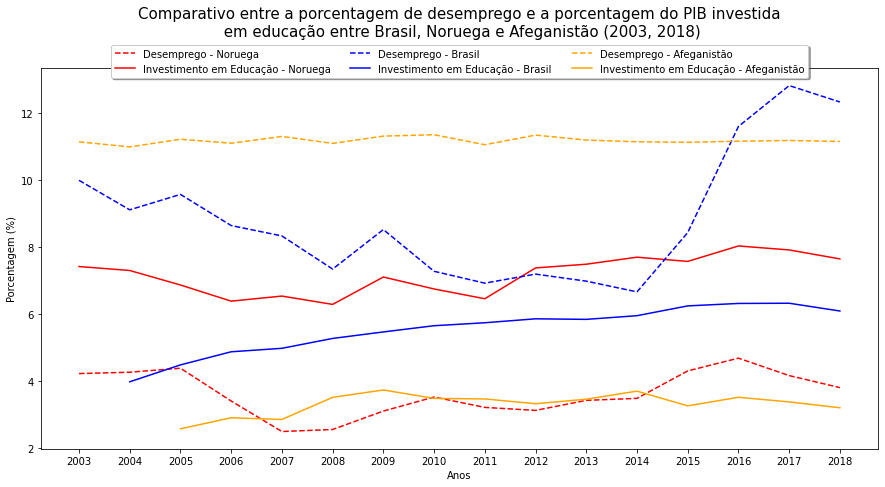

In [210]:
# plot de cada indicador definido pelos anos definidos
plt.figure(figsize=(15,7))
plt.plot(anos,df_desem_nor[anos].iloc[0] , "r--", color= 'red', label= 'Desemprego - Noruega')
plt.plot(anos,df_edu_nor[anos].iloc[0]  , color= 'red', label= 'Investimento em Educação - Noruega')
plt.plot(anos,df_desem_br[anos].iloc[0]  , "r--", color= 'blue', label= 'Desemprego - Brasil')
plt.plot(anos,df_edu_br[anos].iloc[0] , color= 'blue', label= 'Investimento em Educação - Brasil')
plt.plot(anos,df_desem_afg[anos].iloc[0] ,"r--", color= 'orange', label= 'Desemprego - Afeganistão')
plt.plot(anos,df_edu_afg[anos].iloc[0] ,color= 'orange', label= 'Investimento em Educação - Afeganistão')

# legendas e labels
plt.title('Comparativo entre a porcentagem de desemprego e a porcentagem do PIB investida\n em educação entre Brasil, Noruega e Afeganistão (2003, 2018)', y=1.07, fontsize=15)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.075), ncol=3, fancybox=True, shadow=True)
plt.xlabel('Anos')
plt.ylabel('Porcentagem (%)')
plt.xticks(anos)
plt.show()


# Análises bivariadas

* Norway

In [211]:
df_edu_nor = df_edu[df_edu['Country Name'] == 'Norway']
df_desem_nor = df_desem[df_desem['Country Name'] == 'Norway']

df_edu_nor = df_edu_nor[anos].T
df_edu_nor = df_edu_nor.rename(columns={177:'edu'}, errors="raise")

df_desem_nor = df_desem_nor[anos].T
df_desem_nor = df_desem_nor.rename(columns={177:'desem'}, errors="raise")

df_merge = pd.concat((df_desem_nor,df_edu_nor), join = 'outer', axis =1)

df_merge.corr()


,desem,edu
desem,1.000000,0.654306
edu,0.654306,1.000000


In [212]:
df_merge.cov()

,desem,edu
desem,0.432246,0.242443
edu,0.242443,0.317634


* Brazil

In [213]:
df_edu_br = df_edu[df_edu['Country Name'] == 'Brazil']
df_desem_br = df_desem[df_desem['Country Name'] == 'Brazil']

df_edu_br = df_edu_br[anos].T

df_edu_br = df_edu_br.rename(columns={29:'edu'}, errors="raise")

df_desem_br = df_desem_br[anos].T
df_desem_br = df_desem_br.rename(columns={29:'desem'}, errors="raise")

df_merge = pd.concat((df_desem_br,df_edu_br), join = 'outer', axis =1)

df_merge.corr()


,desem,edu
desem,1.000000,0.204663
edu,0.204663,1.000000


In [214]:
df_merge.cov()

,desem,edu
desem,3.830393,0.286128
edu,0.286128,0.487889


* Afghanistan

In [215]:
df_edu_afg = df_edu[df_edu['Country Name'] == 'Afghanistan']
df_desem_afg = df_desem[df_desem['Country Name'] == 'Afghanistan']

df_edu_afg = df_edu_afg[anos].T

df_edu_afg = df_edu_afg.rename(columns={2:'edu'}, errors="raise")

df_desem_afg = df_desem_afg[anos].T
df_desem_afg = df_desem_afg.rename(columns={2:'desem'}, errors="raise")

df_merge = pd.concat((df_desem_afg,df_edu_afg), join = 'outer', axis =1)

df_merge.corr()


,desem,edu
desem,1.000000,-0.027527
edu,-0.027527,1.000000


In [216]:
df_merge.cov()

,desem,edu
desem,0.010846,-0.000881
edu,-0.000881,0.109594
